In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 3000

zmin = 5.2
zmax = 8

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2

from scipy.interpolate import interp1d


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_Kkappa = get_f_Kkappa()


f_KLIM   = interp1d(x=chis, y = KI_Lya, bounds_error = False, fill_value=0)
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
oup_fname = '/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax)
print(oup_fname)

/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_3000_zmin_5.2_zmax_8.0.npy


In [3]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

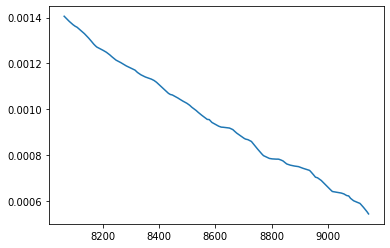

In [4]:
import matplotlib.pyplot as plt
plt.plot(external_chis, f_KLIM(external_chis))

In [5]:
from scipy.interpolate import LinearNDInterpolator


In [6]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [7]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [8]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [9]:
from scipy.integrate import quad_vec

In [10]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 3000/3000 [06:07<00:00,  8.17it/s] 


In [11]:
import matplotlib.pyplot as plt

In [12]:
np.save(oup_fname, unfiltered_auto)

4.322353376198247e-11 4.322353376198247e-11


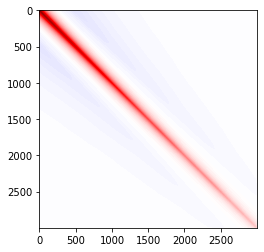

4.3249165518363195e-11 4.3249165518363195e-11


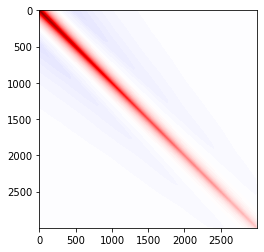

4.327686648966422e-11 4.327686648966422e-11


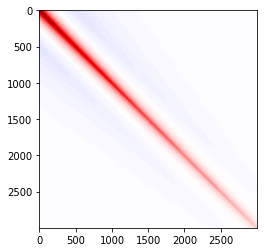

4.330674913727949e-11 4.330674913727949e-11


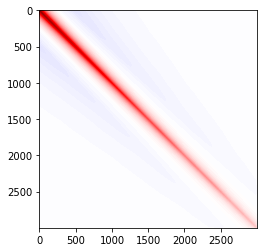

4.333892151097941e-11 4.333892151097941e-11


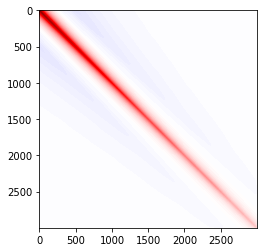

4.3373484746430966e-11 4.3373484746430966e-11


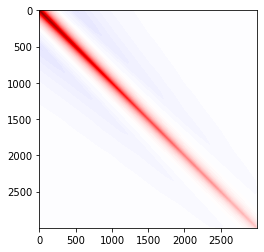

4.341052985550347e-11 4.341052985550347e-11


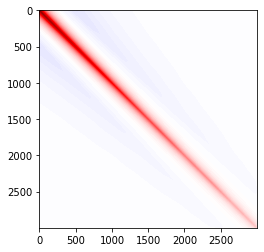

4.345013376529669e-11 4.345013376529669e-11


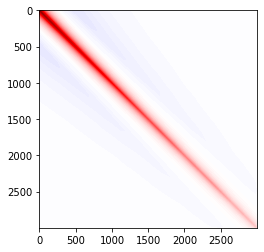

4.349235417894633e-11 4.349235417894633e-11


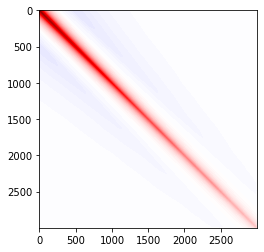

4.353722447978313e-11 4.353722447978313e-11


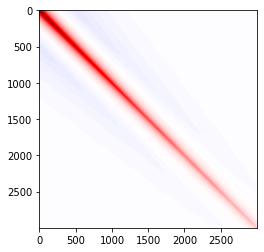

4.3584748580276125e-11 4.3584748580276125e-11


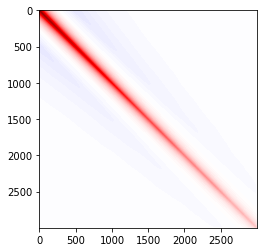

4.363489411701154e-11 4.363489411701154e-11


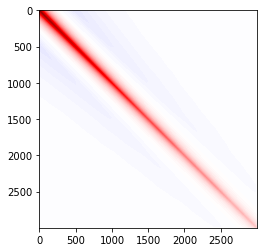

4.368758437179755e-11 4.368758437179755e-11


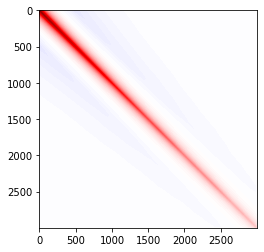

4.374268816628611e-11 4.374268816628611e-11


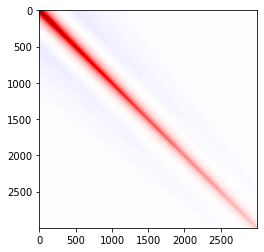

4.380000959654625e-11 4.380000959654625e-11


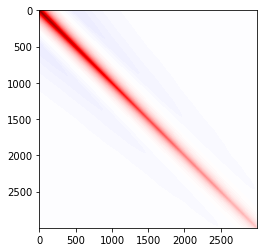

4.3859277977342387e-11 4.3859277977342387e-11


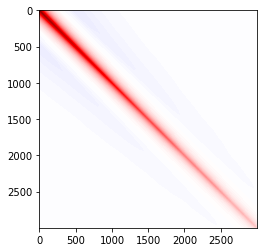

4.392013452222681e-11 4.392013452222681e-11


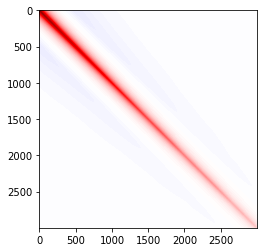

4.398211840046287e-11 4.398211840046287e-11


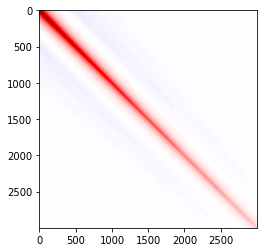

4.4044651446335214e-11 4.4044651446335214e-11


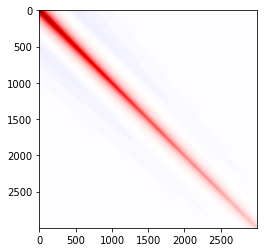

4.4107021326649226e-11 4.4107021326649226e-11


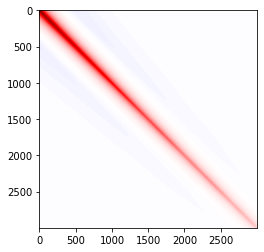

4.4168363861311583e-11 4.4168363861311583e-11


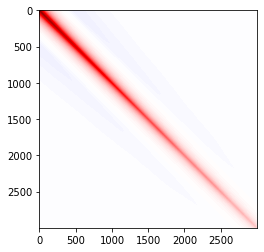

4.4227644252579e-11 4.4227644252579e-11


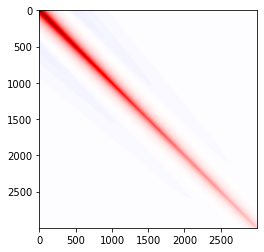

4.428363704778149e-11 4.428363704778149e-11


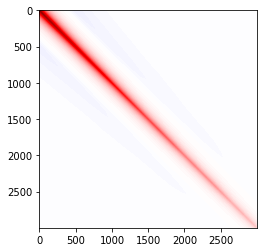

4.4334906253322336e-11 4.4334906253322336e-11


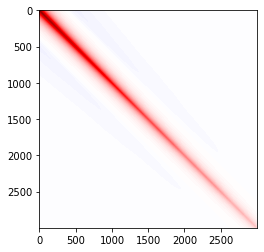

4.437978519022202e-11 4.437978519022202e-11


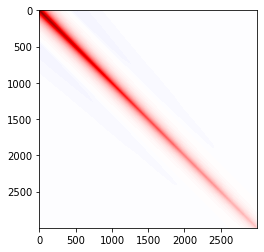

4.4416357325137716e-11 4.4416357325137716e-11


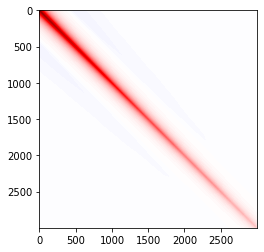

4.444243871841368e-11 4.444243871841368e-11


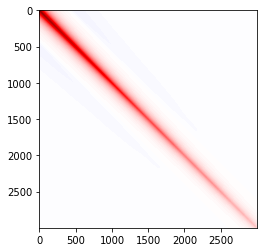

4.4455563978119224e-11 4.4455563978119224e-11


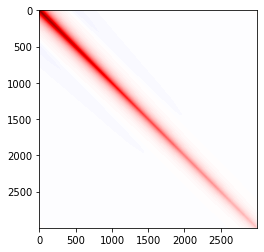

4.445297631680108e-11 4.445297631680108e-11


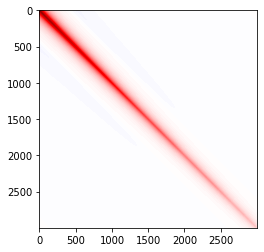

4.443162516867893e-11 4.443162516867893e-11


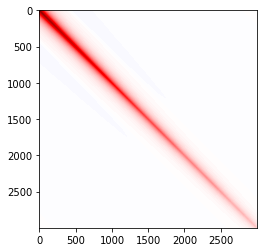

4.4388172273223384e-11 4.4388172273223384e-11


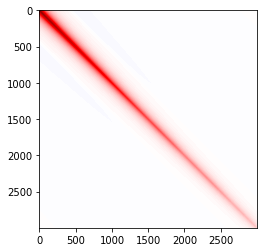

4.431901099155349e-11 4.431901099155349e-11


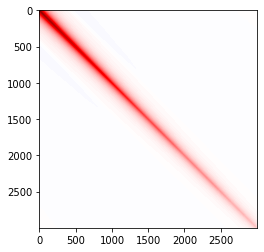

4.4220300780032535e-11 4.4220300780032535e-11


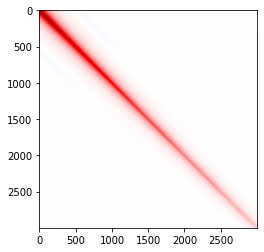

4.4088021762178086e-11 4.4088021762178086e-11


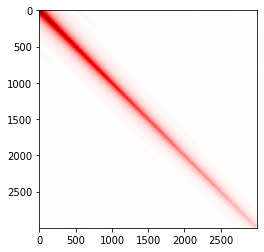

4.391805414222736e-11 4.391805414222736e-11


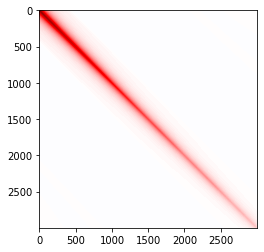

4.37062833647918e-11 4.37062833647918e-11


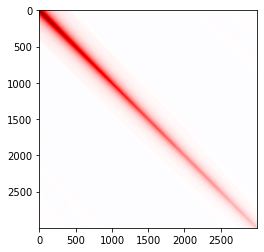

4.344874024089231e-11 4.344874024089231e-11


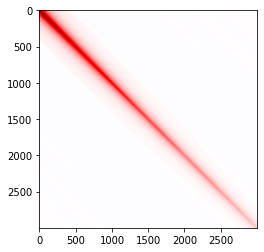

4.3141771575901444e-11 4.3141771575901444e-11


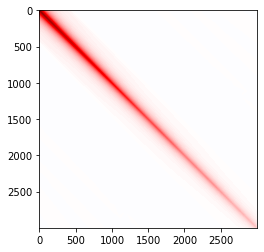

4.2782247971778864e-11 4.2782247971778864e-11


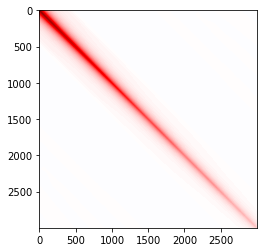

4.236779887111469e-11 4.236779887111469e-11


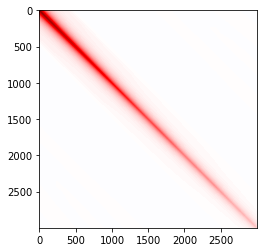

4.189707448492217e-11 4.189707448492217e-11


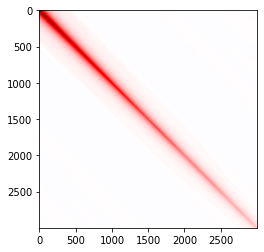

4.137001013306772e-11 4.137001013306772e-11


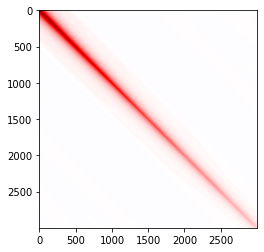

4.0788078792065934e-11 4.0788078792065934e-11


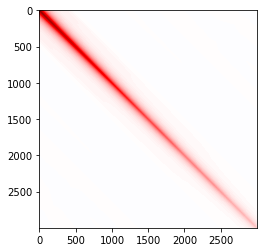

4.0154495882370215e-11 4.0154495882370215e-11


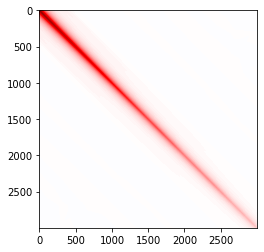

3.947432733634272e-11 3.947432733634272e-11


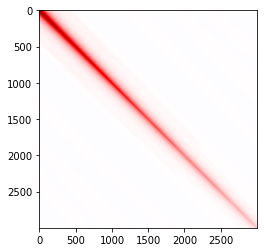

3.875445384709468e-11 3.875445384709468e-11


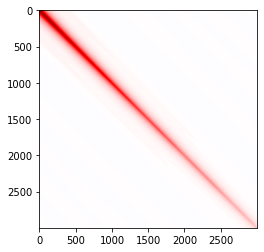

3.800331405712208e-11 3.800331405712208e-11


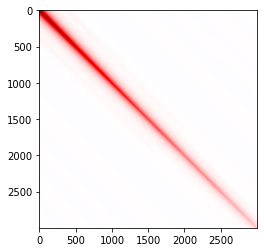

3.723033816911324e-11 3.723033816911324e-11


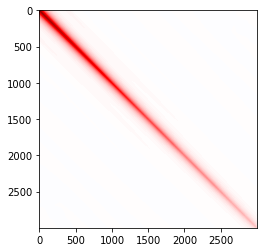

3.644452315774706e-11 3.644452315774706e-11


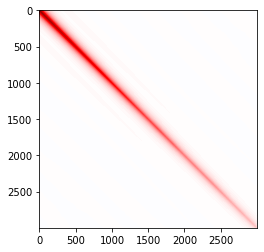

3.5655777036737735e-11 3.5655777036737735e-11


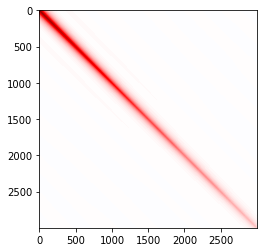

3.4874306776645314e-11 3.4874306776645314e-11


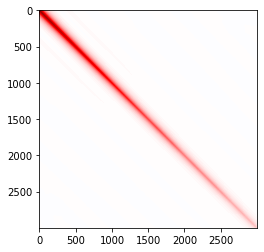

3.4104249569567555e-11 3.4104249569567555e-11


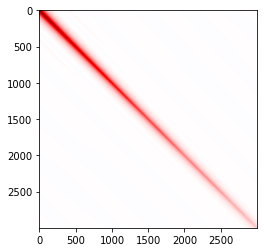

3.33435825730964e-11 3.33435825730964e-11


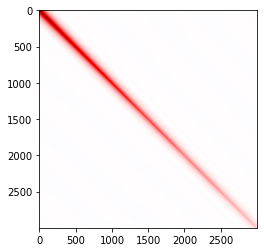

3.258413127296685e-11 3.258413127296685e-11


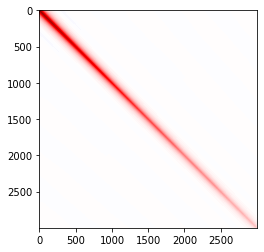

3.181312971536933e-11 3.181312971536933e-11


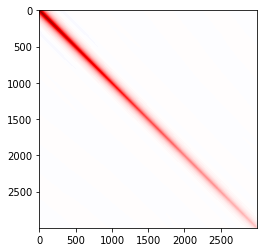

3.101642103527088e-11 3.101642103527088e-11


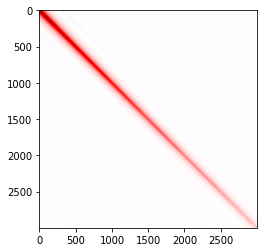

3.017138656840576e-11 3.017138656840576e-11


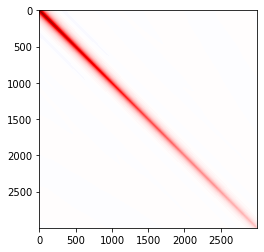

2.924750298450913e-11 2.924750298450913e-11


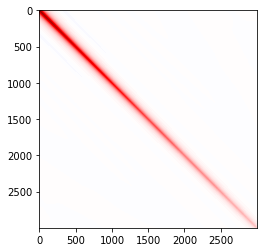

2.8234123492402328e-11 2.8234123492402328e-11


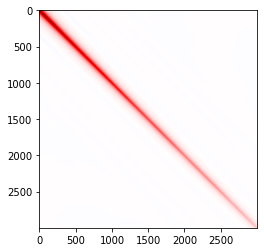

2.7130968114864288e-11 2.7130968114864288e-11


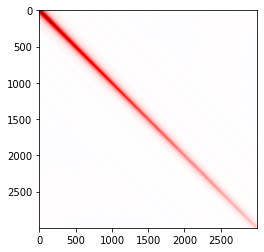

2.5960796228419322e-11 2.5960796228419322e-11


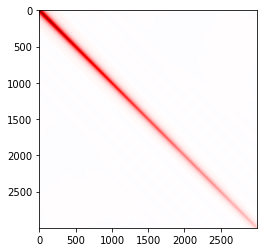

2.47674560963812e-11 2.47674560963812e-11


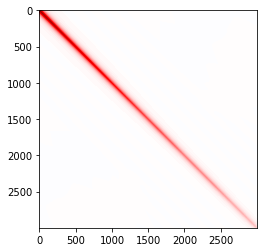

2.360544768406808e-11 2.360544768406808e-11


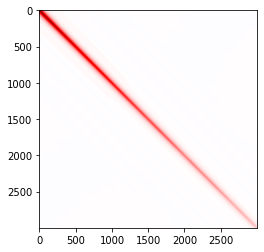

2.2525993011788854e-11 2.2525993011788854e-11


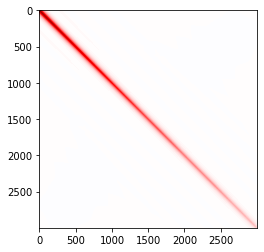

2.155975496522683e-11 2.155975496522683e-11


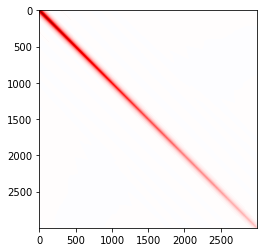

2.0697770669668915e-11 2.0697770669668915e-11


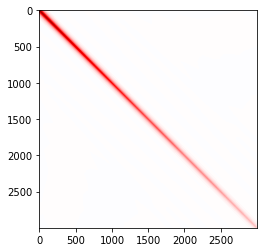

1.9887886959056234e-11 1.9887886959056234e-11


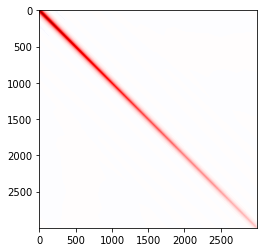

1.9054233145270524e-11 1.9054233145270524e-11


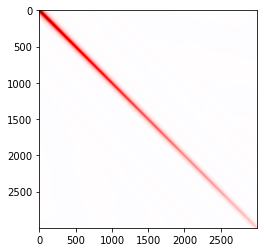

1.813018697087427e-11 1.813018697087427e-11


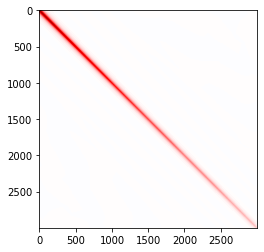

1.711264294717542e-11 1.711264294717542e-11


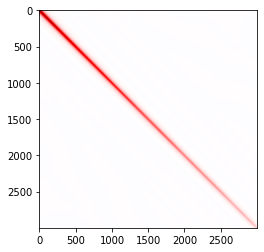

1.608462617404046e-11 1.608462617404046e-11


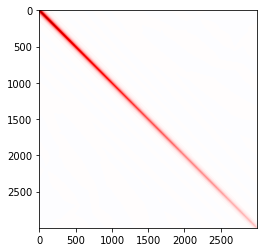

1.514778411485199e-11 1.514778411485199e-11


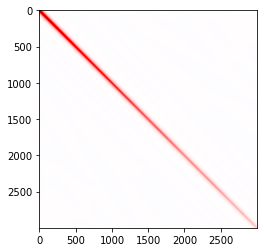

1.4351622908921795e-11 1.4351622908921795e-11


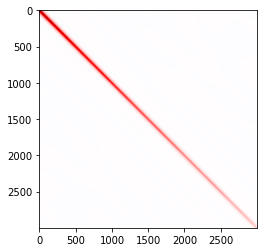

1.3642698147038084e-11 1.3642698147038084e-11


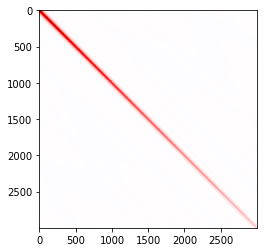

1.2910568976907135e-11 1.2910568976907135e-11


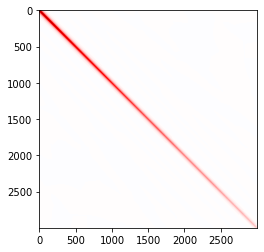

1.2108657694982325e-11 1.2108657694982325e-11


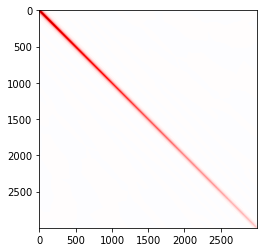

1.1310138651262375e-11 1.1310138651262375e-11


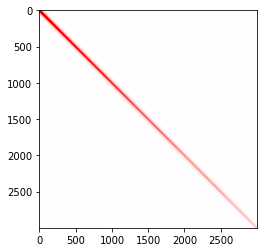

1.0612782749105359e-11 1.0612782749105359e-11


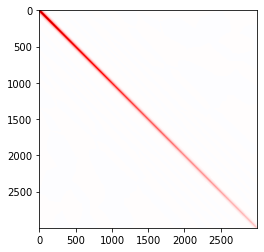

9.998812378510908e-12 9.998812378510908e-12


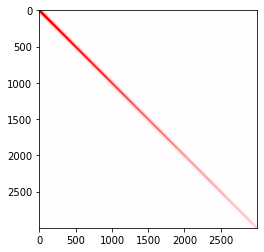

9.374242997591858e-12 9.374242997591858e-12


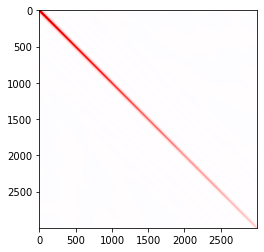

8.73337263642599e-12 8.73337263642599e-12


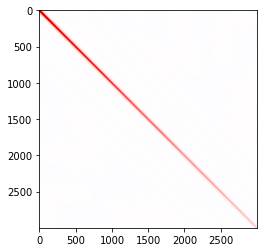

8.152337759755592e-12 8.152337759755592e-12


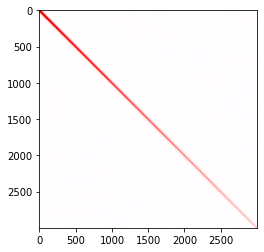

7.627077614674042e-12 7.627077614674042e-12


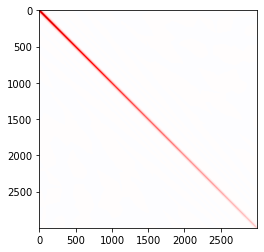

7.10267174242052e-12 7.10267174242052e-12


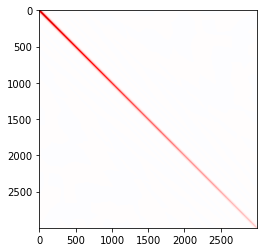

6.6034708676051245e-12 6.6034708676051245e-12


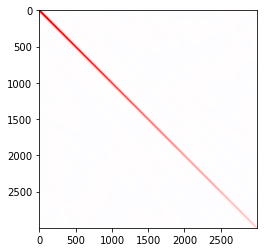

6.1488845558548306e-12 6.1488845558548306e-12


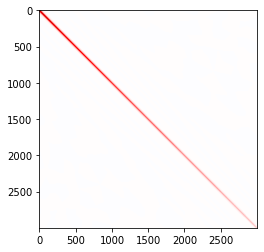

5.709571217760524e-12 5.709571217760524e-12


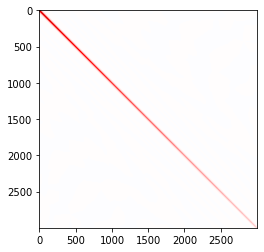

5.297370829437255e-12 5.297370829437255e-12


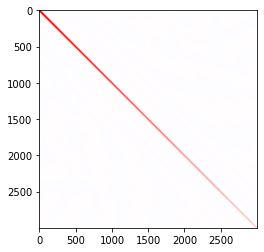

4.913146941853514e-12 4.913146941853514e-12


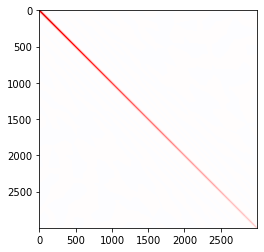

4.549080783071835e-12 4.549080783071835e-12


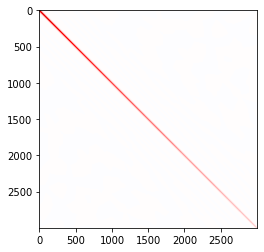

4.2103645309914e-12 4.2103645309914e-12


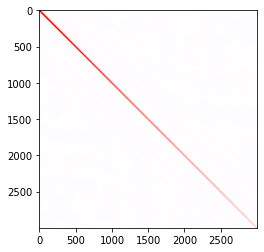

3.891922411778062e-12 3.891922411778062e-12


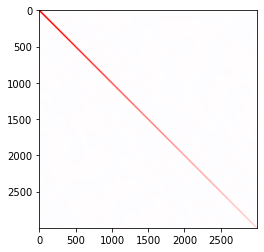

3.595104597259172e-12 3.595104597259172e-12


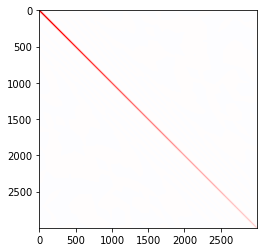

3.3176467624126317e-12 3.3176467624126317e-12


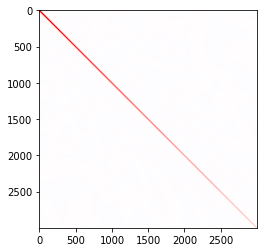

3.0592693384873986e-12 3.0592693384873986e-12


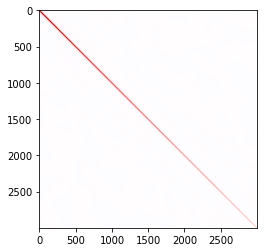

2.8184912183013677e-12 2.8184912183013677e-12


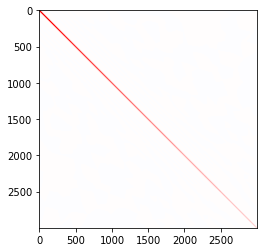

2.5945098167094433e-12 2.5945098167094433e-12


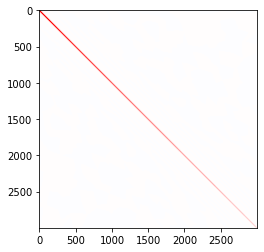

2.3864901811554907e-12 2.3864901811554907e-12


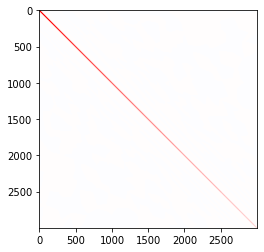

2.1935273859485746e-12 2.1935273859485746e-12


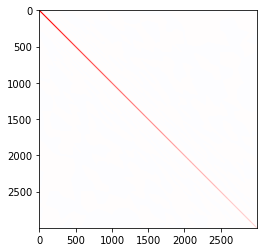

2.0146889547115076e-12 2.0146889547115076e-12


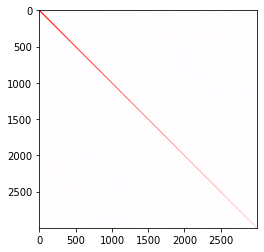

In [13]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()